# Analisi ospedalizzati


In [13]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from aidam.math_utils import moving_function_rev1
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax,auto_grid_shape

Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni

In [14]:
# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)

# grid shape
grid_shape=(7,3)
grid_seq=get_subplot_cells_sequence(grid_shape)

## Lettura dati

In [15]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 95
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-05-28T17:00:00


### Inserimento di eventi notevoli riferiti a date

In [16]:
lockdown={'data':'2020-03-10',
          'id_giorno':15,
          'desc':'Lockdown'}

scuole_chiuse={'data':'2020-03-04',
               'id_giorno':9,
               'desc':'Scuole chiuse'}

fase_2={'data':'2020-05-04',
               'id_giorno':71,
               'desc':'Fase2'}


eventi=[scuole_chiuse,lockdown, fase_2]

## Grafici Nazionali

## Trend del totale dei positivi vs ospedalizzati di vario genere

### Italia

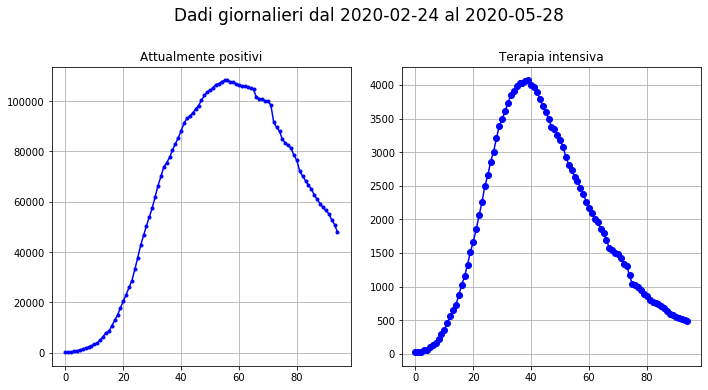

In [17]:
fig,ax=plt.subplots(1,2,sharey=False,figsize=(10,5))
#fig.suptitle('Tamponi effettuati', y=1.02,fontsize=25)
fig.suptitle('Dadi giornalieri dal %s al %s'%(giorni[0][0:10],giorni[-1][0:10]), y=1.1,fontsize=17)
fig.tight_layout(pad=2.0)

ax[0].plot(day_counter,trend['totale_positivi']['Italia'],
         'b.-',
         label='Attualmente positivi')
ax[0].set_title('Attualmente positivi')
ax[0].grid()

ax[1].plot(day_counter,trend['terapia_intensiva']['Italia'],
         'bo-',
         label='Terapia intensiva')
ax[1].set_title('Terapia intensiva')
ax[1].grid()

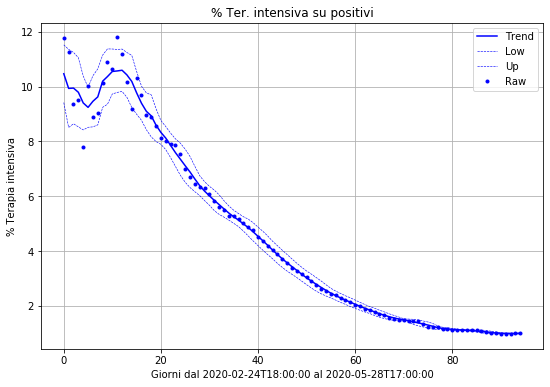

In [18]:
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            100*trend['terapia_intensiva']['Italia']/trend['totale_positivi']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation', )
ax.set_title('% Ter. intensiva su positivi')
ax.set_xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
ax.set_ylabel('% Terapia intensiva')
# stampo anche a punti il dato raw
ax.plot(100*trend['terapia_intensiva']['Italia']/trend['totale_positivi']['Italia'],'b.')
ax.legend(['Trend','Low','Up','Raw'])
ax.grid()



## Grafici per regione

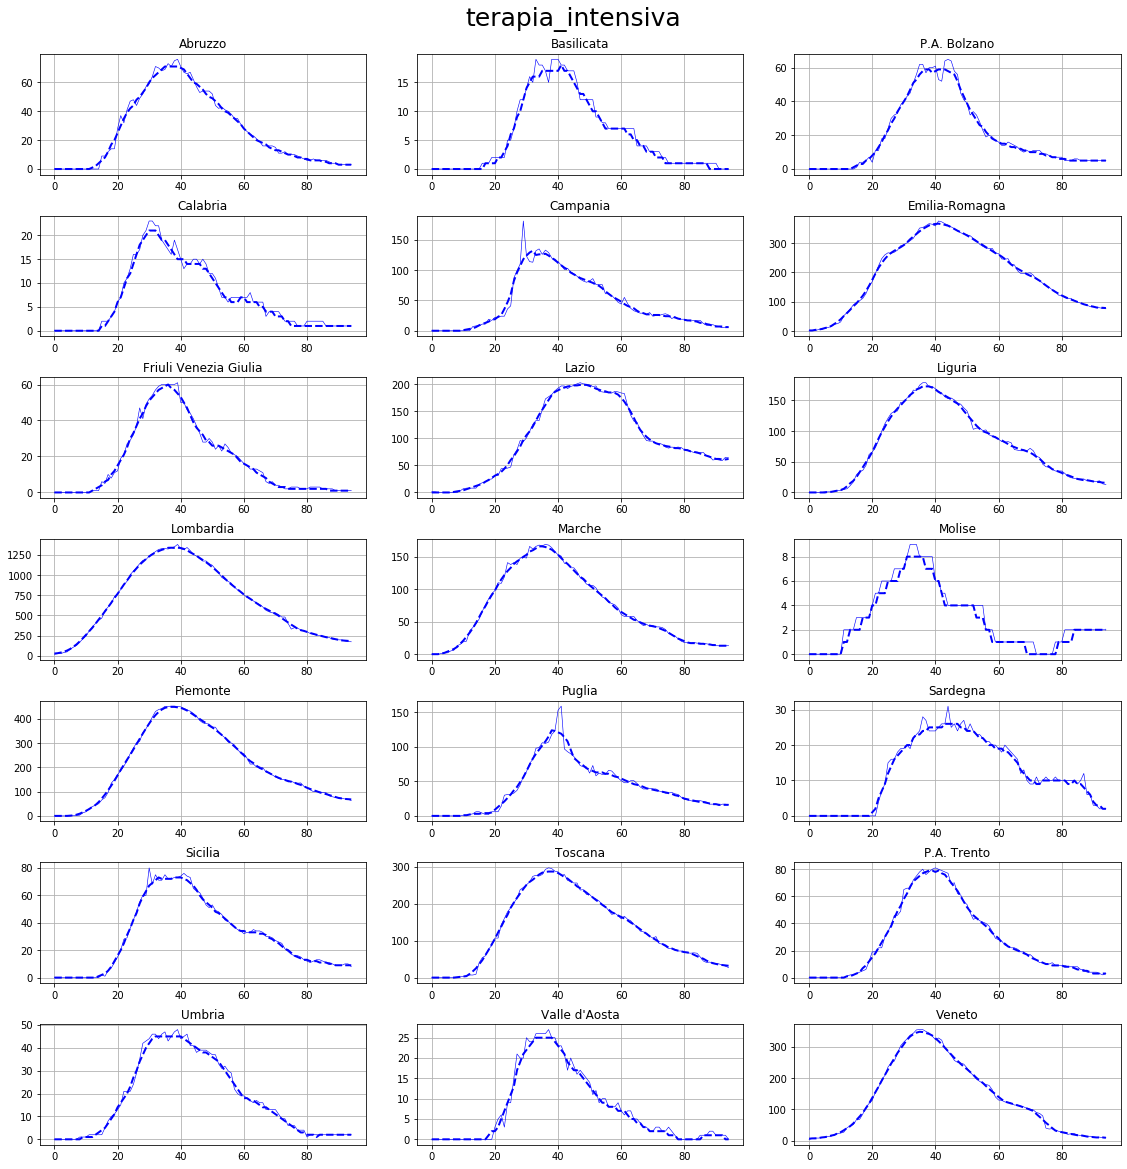

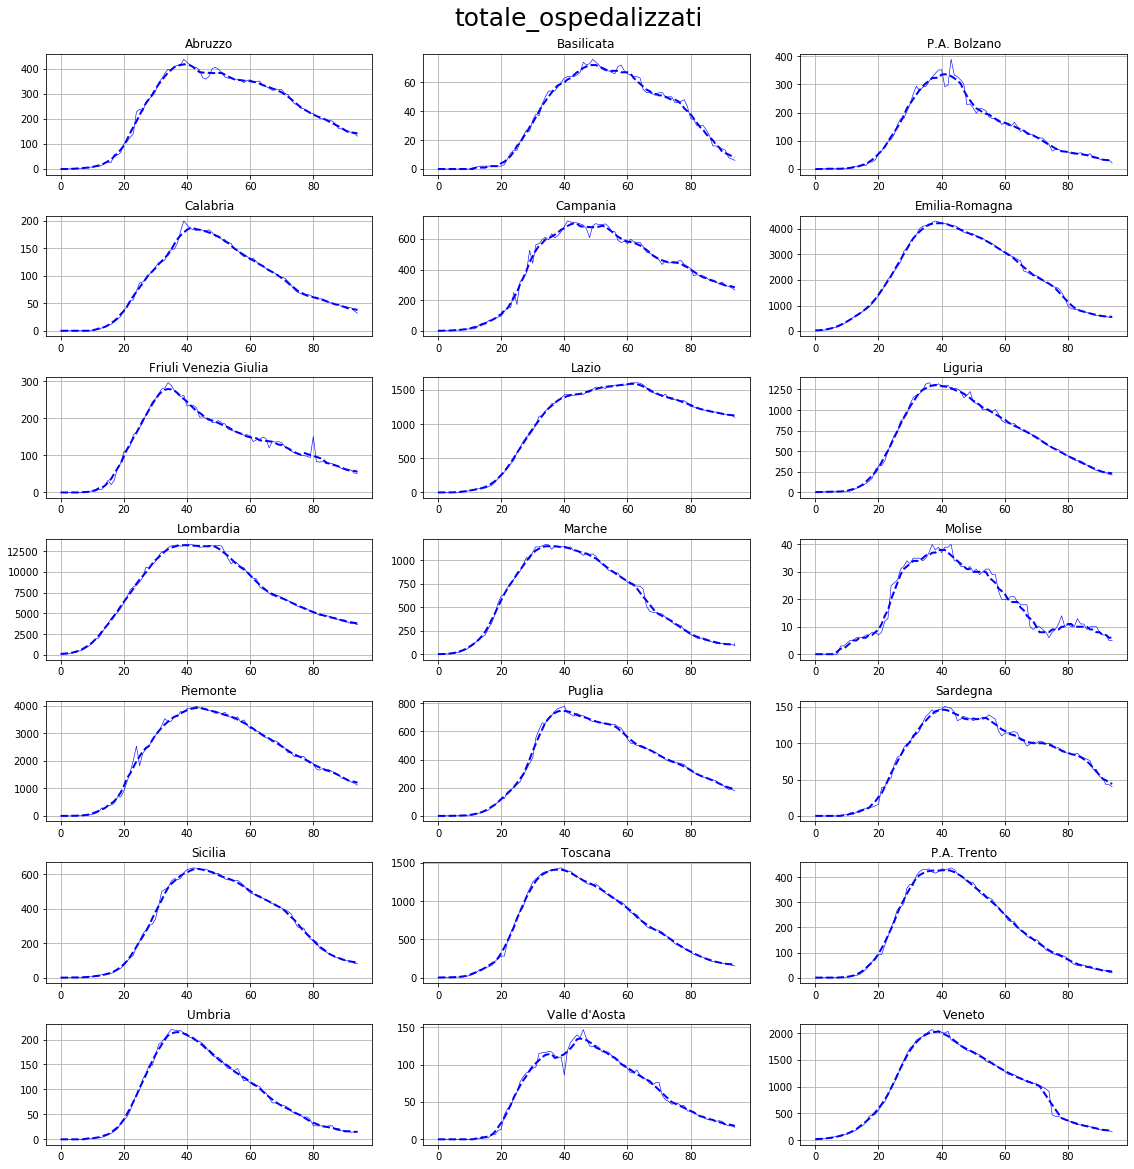

In [19]:
indicatori_selected=['terapia_intensiva',
                    'totale_ospedalizzati']

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_seq[i]].plot(day_counter,trend[indicatore][regione],
                             'b-',linewidth=0.6,label='Reg')
        ax[grid_seq[i]].plot(day_counter,moving_function_rev1(trend[indicatore][regione],np.mean,3,3),
                             'b--',linewidth=2,label='Trend')
        ax[grid_seq[i]].set_title(regione)
        #ax[grid_seq[i]].legend()
        ax[grid_seq[i]].grid()

## Distribuzione ospedalizzati nel tempo

In [20]:
categories=['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare']
values=[trend[c]['Italia'] for c in categories]
values=np.array(values)

values.shape

(3, 95)

### Trend scatter plot

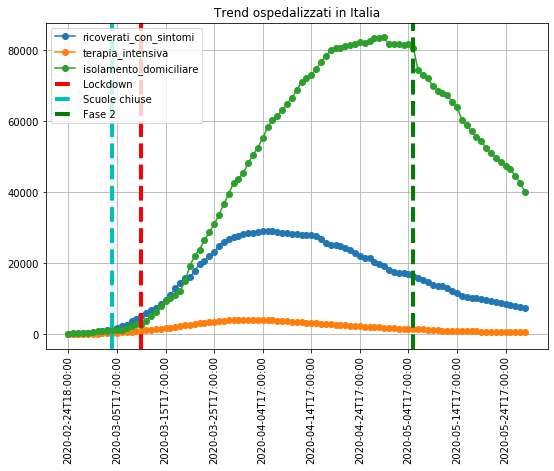

In [21]:
plt.figure(figsize=figsize_single)
for indicatore in categories:
    plt.plot(day_counter,trend[indicatore]['Italia'],'o-',label=indicatore)

plt.grid()
plt.title('Trend ospedalizzati in Italia')
plt.xticks(list(range(0,len(giorni),10)),giorni[list(range(0,len(giorni),10))],rotation=90)

plt.axvline(x=lockdown['id_giorno'],c='r', label='Lockdown',linewidth=4,ls='--')
plt.axvline(x=scuole_chiuse['id_giorno'],c='c', label='Scuole chiuse',linewidth=4,ls='--')
plt.axvline(x=fase_2['id_giorno'],c='g', label='Fase 2',linewidth=4,ls='--')
plt.legend()

### Pie charts

In [22]:
giorni_pie=np.arange(0,len(giorni),5)

# grid shape
grid_pie=auto_grid_shape(len(giorni_pie),cols=4)
grid_pie_seq=get_subplot_cells_sequence(grid_pie)

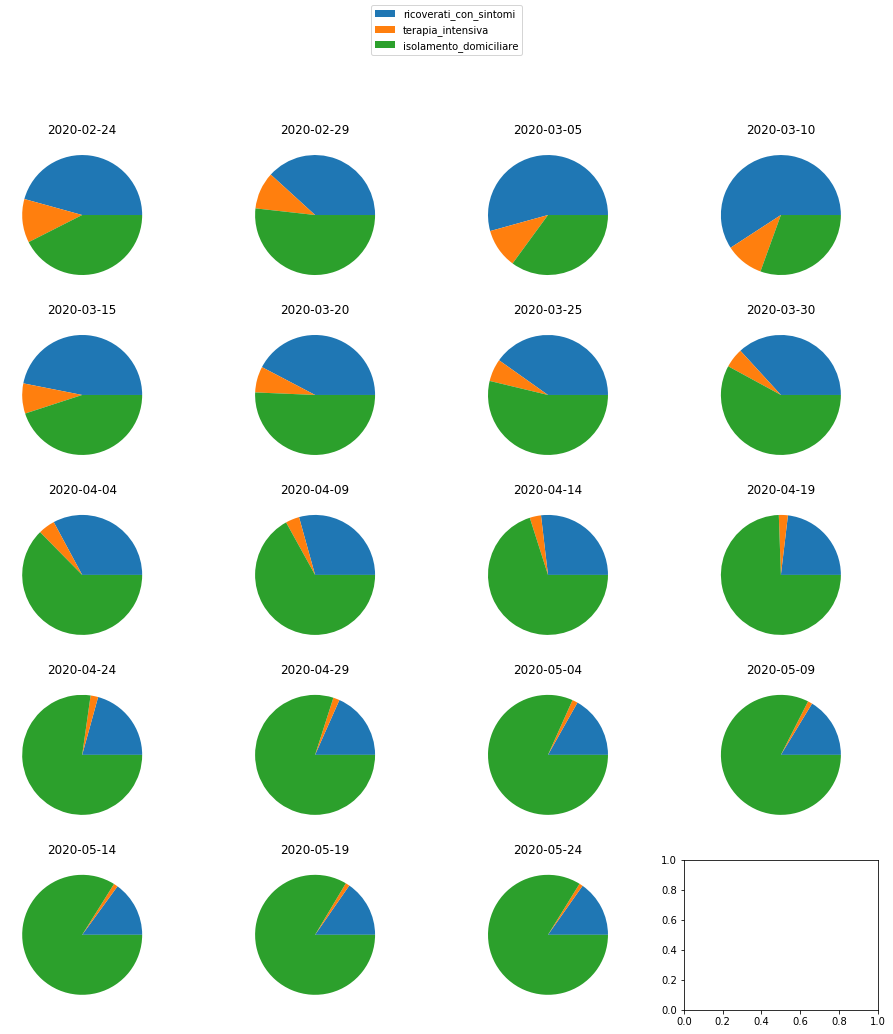

In [23]:
fig,ax=plt.subplots(grid_pie[0],grid_pie[1],sharey=False,figsize=figsize_multi)
#fig.suptitle(indicatore, y=1.02,fontsize=25)
#fig.tight_layout(pad=2)

for i,g in enumerate(giorni_pie):
    ax[grid_pie_seq[i]].set_title(giorni[g][0:10])
    ax[grid_pie_seq[i]].pie(values[:,g])
    #ax[grid_pie_seq[i]].legend(categories)

fig.legend(categories, loc='upper center')